<a href="https://colab.research.google.com/github/faiyazansari566/Housing-Price-Prediction/blob/main/house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
import os  

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
import io
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,...,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,...,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,...,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,...,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,...,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [4]:
uploaded = files.upload()

Saving test.csv to test.csv


In [5]:
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [6]:
train.shape ,test.shape

((1168, 81), (292, 80))

In [7]:
for i in train.columns:
  print(i)
  print(train[i].value_counts())
  print('\n')

Id
1460    1
501     1
476     1
477     1
478     1
       ..
959     1
961     1
962     1
963     1
1       1
Name: Id, Length: 1168, dtype: int64


MSSubClass
20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64


MSZoning
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64


LotFrontage
60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
        ... 
112.0      1
111.0      1
144.0      1
102.0      1
149.0      1
Name: LotFrontage, Length: 106, dtype: int64


LotArea
9600     21
7200     18
6000     16
8400     14
9000     11
         ..
9439      1
7390      1
8160      1
7388      1
13284     1
Name: LotArea, Length: 892, dtype: int64


Street
Pave    1164
Grvl       4
Name: Street, dtype: int64


Alley
Grvl    41
Pave    36
Name: Alley, dtype: int64


LotShape
Reg    740
I

In [8]:
pd.set_option('max_rows', 10000)

In [9]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [10]:
train.shape

(1168, 81)

In [11]:
train['Alley'].isnull().sum()

1091

In [12]:
df =train.drop(['FireplaceQu','Alley','PoolQC','Fence','MiscFeature'],axis=1)   ##these features are having more than 50% of null values ..hence it is dropped

In [13]:
df.drop('Id',axis=1,inplace=True)

In [14]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         7
MasVnrArea         7
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinSF1         0
BsmtFinType2      31
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath     

In [15]:
##filling null values

In [16]:
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0]) 
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0]) 
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0]) 
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0]) 
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0]) 
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median()) 
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0]) 
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0]) 
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median()) 


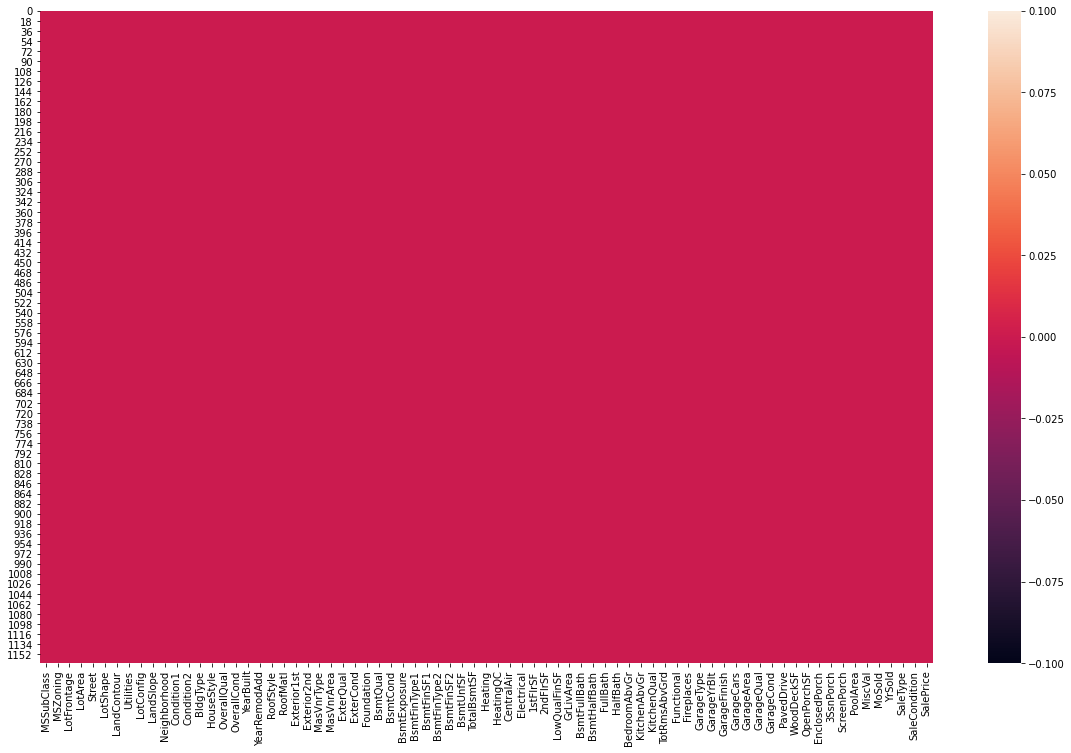

In [17]:
plt.figure(figsize=(20,12))
sns.heatmap(df.isnull())

In [18]:
## all the null values are handled.

In [19]:
df.shape

(1168, 75)

In [20]:
train2 = df.copy()

In [21]:
##handling null values for test data

In [22]:
test2 =test.drop(['Id','FireplaceQu','Alley','PoolQC','Fence','MiscFeature'],axis=1)

In [23]:
test2.isnull().sum()

MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        1
MasVnrArea        1
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          7
BsmtCond          7
BsmtExposure      7
BsmtFinType1      7
BsmtFinSF1        0
BsmtFinType2      7
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0


In [24]:
test2['MasVnrType'] = test2['MasVnrType'].fillna(test2['MasVnrType'].mode()[0]) 
test2['MasVnrArea'] = test2['MasVnrArea'].fillna(test2['MasVnrArea'].median())
test2['BsmtQual'] = test2['BsmtQual'].fillna(test2['BsmtQual'].mode()[0])
test2['BsmtCond'] = test2['BsmtCond'].fillna(test2['BsmtCond'].mode()[0]) 
test2['BsmtExposure'] = test2['BsmtExposure'].fillna(test2['BsmtExposure'].mode()[0]) 
test2['BsmtFinType1'] = test2['BsmtFinType1'].fillna(test2['BsmtFinType1'].mode()[0])
test2['BsmtFinType2'] = test2['BsmtFinType2'].fillna(test2['BsmtFinType2'].mode()[0])
test2['GarageType'] = test2['GarageType'].fillna(test2['GarageType'].mode()[0]) 
test2['GarageFinish'] = test2['GarageFinish'].fillna(test2['GarageFinish'].mode()[0]) 
test2['GarageYrBlt'] = test2['GarageYrBlt'].fillna(test2['GarageYrBlt'].median()) 
test2['GarageQual'] = test2['GarageQual'].fillna(test2['GarageQual'].mode()[0]) 
test2['GarageCond'] = test2['GarageCond'].fillna(test2['GarageCond'].mode()[0]) 
test2['LotFrontage'] = test2['LotFrontage'].fillna(test2['LotFrontage'].median()) 

In [25]:
test2.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

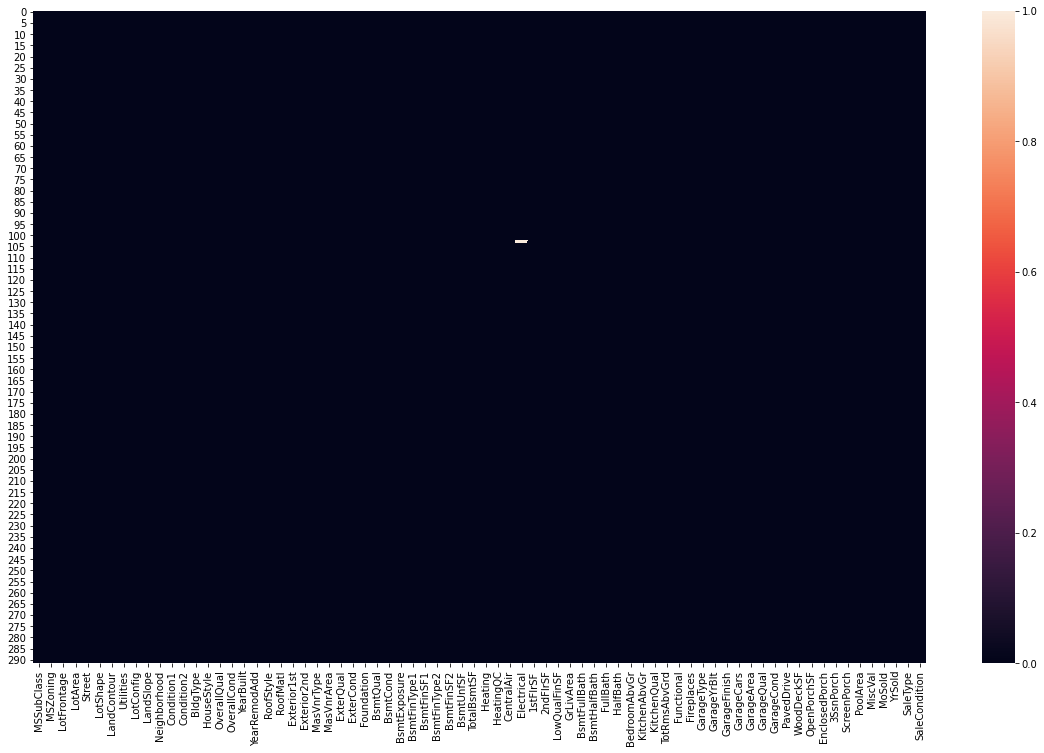

In [26]:
plt.figure(figsize=(20,12))
sns.heatmap(test2.isnull())

In [27]:
## all the null values in train and test are handled

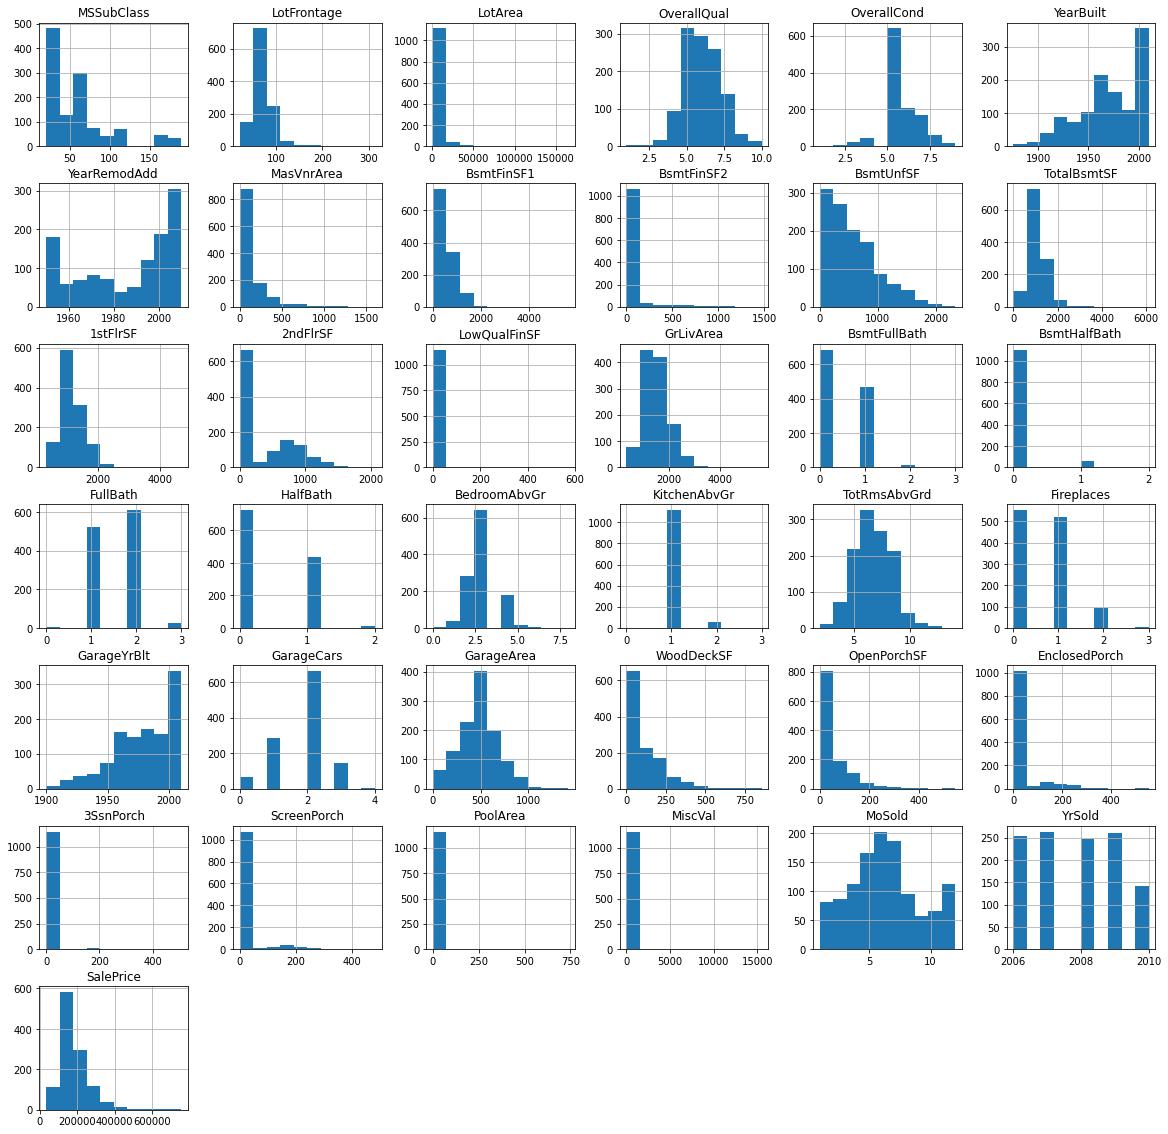

In [28]:
train2.hist(figsize=(20,20))
plt.show()

In [29]:
##working with outliers

In [30]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   LotShape       1168 non-null   object 
 6   LandContour    1168 non-null   object 
 7   Utilities      1168 non-null   object 
 8   LotConfig      1168 non-null   object 
 9   LandSlope      1168 non-null   object 
 10  Neighborhood   1168 non-null   object 
 11  Condition1     1168 non-null   object 
 12  Condition2     1168 non-null   object 
 13  BldgType       1168 non-null   object 
 14  HouseStyle     1168 non-null   object 
 15  OverallQual    1168 non-null   int64  
 16  OverallCond    1168 non-null   int64  
 17  YearBuilt      1168 non-null   int64  
 18  YearRemo

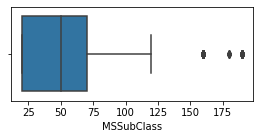

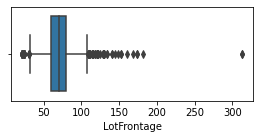

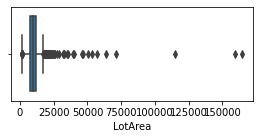

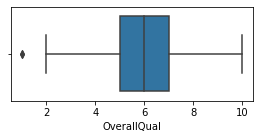

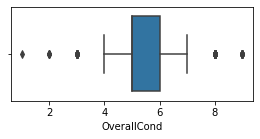

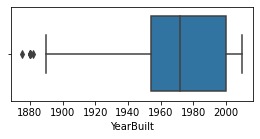

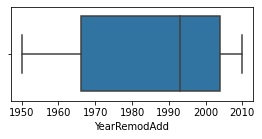

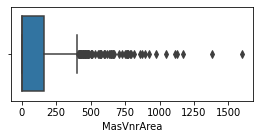

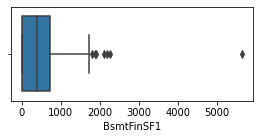

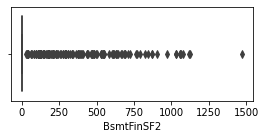

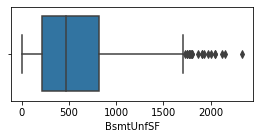

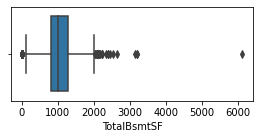

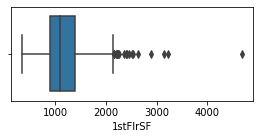

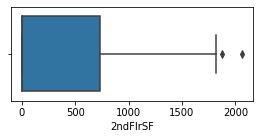

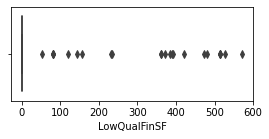

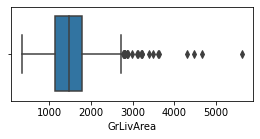

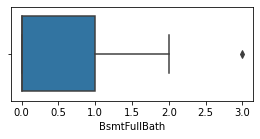

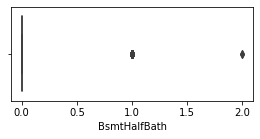

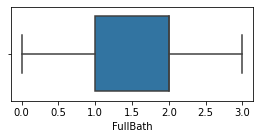

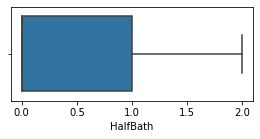

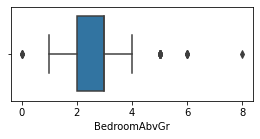

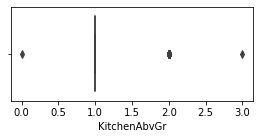

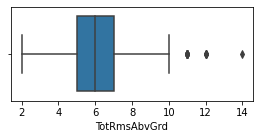

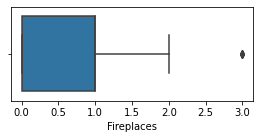

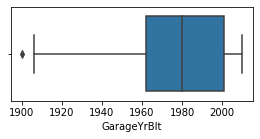

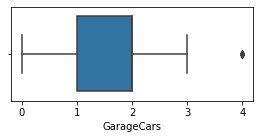

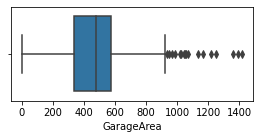

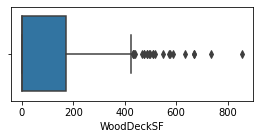

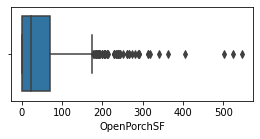

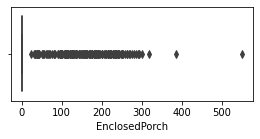

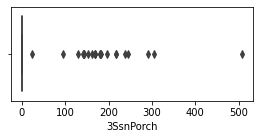

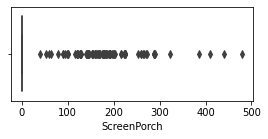

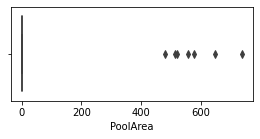

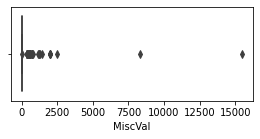

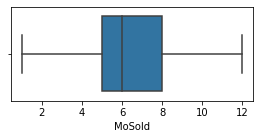

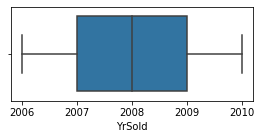

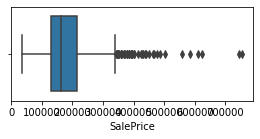

In [31]:
 for i in train2.columns:
    if train2[i].dtypes!='O':
        plt.figure(figsize=(20,10))
        plt.subplot(5,4,3)
        sns.boxplot(train2[i])

In [32]:
##correlations

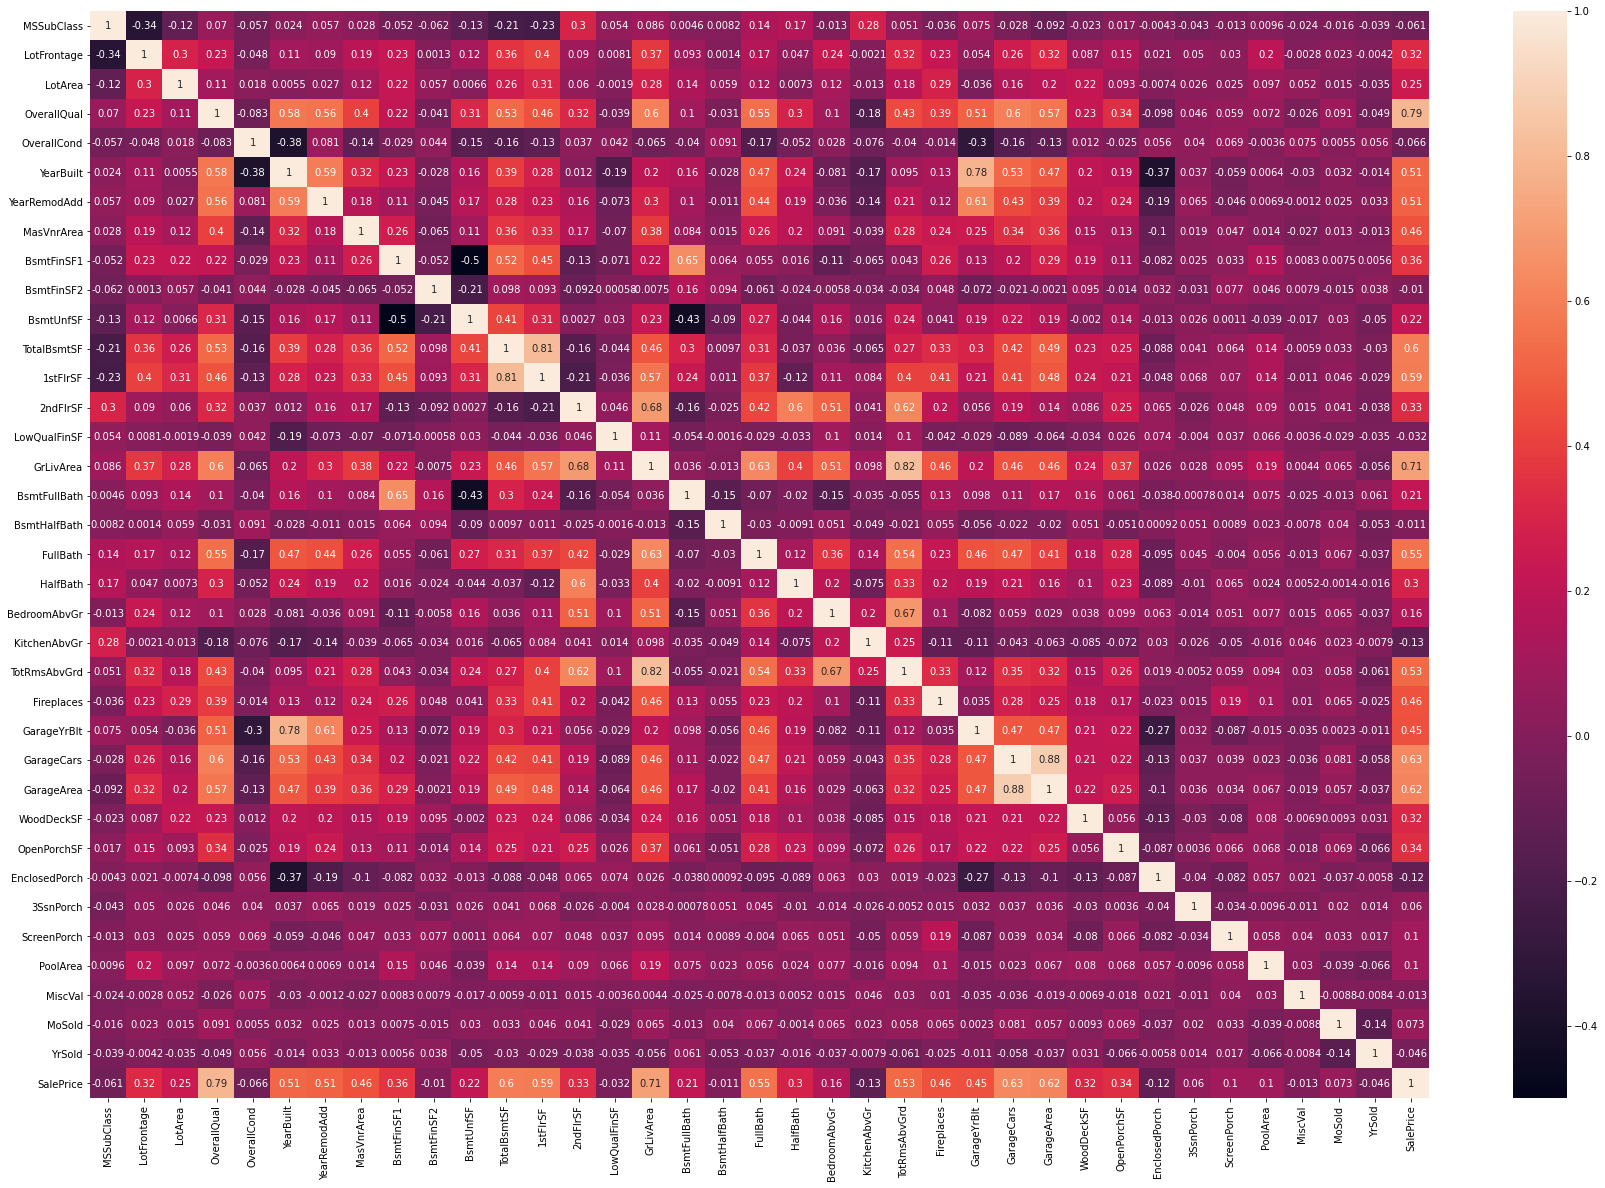

In [33]:
plt.figure(figsize=(30,20))
sns.heatmap(train2.corr(),annot=True)
plt.show()

In [34]:
##least correlation with target vaariable (saleprice)

##MSSubClass = -0.061 
#LotFrontage = 0.32
#LotArea = 0.25
#OverallCond = -0.066
#BsmtFinSF1 = 0.36
#BsmtFinSF2 = -0.01
##BsmtUnfSF = 0.22
##2ndFlrSF = 0.33
##LowQualFinSF = -0.032
##BsmtFullBath = 0.21
##BsmtHalfBath == -0.011
##HalfBath = 0.3
##BedroomAbvGr = 0.16
##KitchenAbvGr = -0.13
##WoodDeckSF = 0.32
##OpenPorchSF = 0.34
##EnclosedPorch = -0.12
##3SsnPorch = 0.06
##ScreenPorch = 0.1
##PoolArea = 0.1
##MiscVal = -0.013
##MoSold = 0.073
##YrSold = -0.046


In [35]:
## high correlation among independent features

## GarageYrBlt = 0.78 with YearBuilt
##TotRmsAbvGrd = 0.82 with GrLivArea
##GarageArea = 0.88 with GarageCars

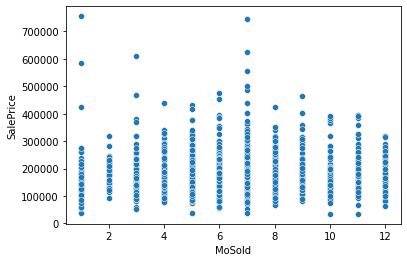

In [36]:
sns.scatterplot(train2['MoSold'],train2['SalePrice'])

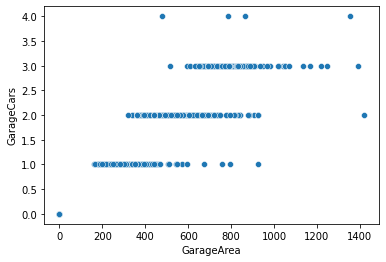

In [37]:
sns.scatterplot(train2['GarageArea'],train2['GarageCars'])

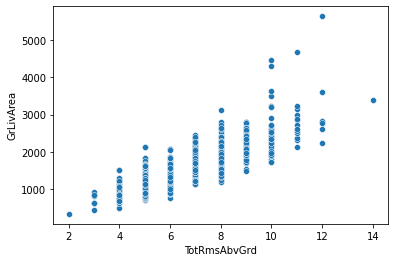

In [38]:
sns.scatterplot(train2['TotRmsAbvGrd'],train2['GrLivArea'])

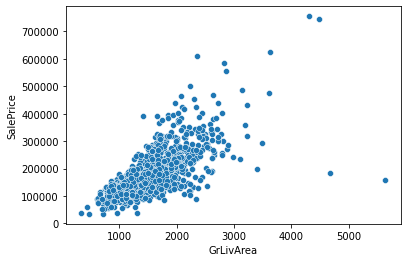

In [39]:
sns.scatterplot(train2['GrLivArea'],train2['SalePrice'])

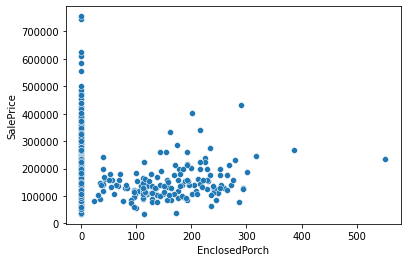

In [40]:
sns.scatterplot(train2['EnclosedPorch'],train2['SalePrice'])

In [41]:
##dropping all these features

In [42]:
train3 = train2.drop(['MSSubClass','LotFrontage','LotArea','OverallCond','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','2ndFlrSF','LowQualFinSF','BsmtFullBath','BsmtHalfBath','HalfBath','BedroomAbvGr','KitchenAbvGr','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','GarageYrBlt','TotRmsAbvGrd','GarageArea'],axis=1)

In [43]:
train3.shape ,train2.shape

((1168, 49), (1168, 75))

In [44]:
test3 = test2.drop(['MSSubClass','LotFrontage','LotArea','OverallCond','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','2ndFlrSF','LowQualFinSF','BsmtFullBath','BsmtHalfBath','HalfBath','BedroomAbvGr','KitchenAbvGr','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','GarageYrBlt','TotRmsAbvGrd','GarageArea'],axis=1)

In [45]:
##using one hot encoding

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
def encoder(df):
  le = LabelEncoder()
  for i in df.columns:
      if df[i].dtypes == 'O' :
          df[i] = pd.DataFrame(le.fit_transform(df[i]))

In [48]:
train4 = train3.copy()

In [49]:
encoder(train4)

In [50]:
test4 = test3.copy()

In [51]:
test4.dropna(axis=0,inplace=True)

In [52]:
encoder(test4)

In [53]:
test4.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,FullBath,KitchenQual,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,21.0,2.0,0.0,0.0,2.0,9,2005,2006,3.0,0.0,9.0,11.0,3.0,200.0,2.0,3.0,2.0,0.0,2.0,1.0,2.0,5.0,1922,0.0,0.0,1.0,3.0,1922,1922,2,2.0,5.0,1,1.0,0.0,3,4.0,4.0,2.0,5.0,2.0
1,2.0,1.0,0.0,3.0,0.0,1.0,0.0,21.0,2.0,0.0,4.0,2.0,8,1984,1984,1.0,0.0,5.0,5.0,2.0,0.0,2.0,3.0,1.0,2.0,2.0,0.0,2.0,5.0,1220,0.0,2.0,1.0,3.0,1360,1360,1,2.0,5.0,1,1.0,1.0,2,4.0,4.0,2.0,0.0,0.0
2,2.0,1.0,3.0,3.0,0.0,4.0,0.0,4.0,2.0,0.0,0.0,2.0,8,2001,2001,3.0,0.0,9.0,11.0,2.0,0.0,2.0,3.0,2.0,2.0,2.0,0.0,5.0,5.0,1753,0.0,0.0,1.0,3.0,1788,1788,2,0.0,5.0,1,1.0,1.0,2,4.0,4.0,2.0,5.0,2.0
3,2.0,1.0,3.0,0.0,0.0,4.0,0.0,5.0,2.0,0.0,0.0,5.0,7,1941,1950,1.0,0.0,6.0,7.0,2.0,0.0,3.0,3.0,1.0,3.0,2.0,3.0,4.0,5.0,704,0.0,0.0,1.0,3.0,860,1564,1,1.0,5.0,1,1.0,2.0,1,4.0,4.0,2.0,5.0,2.0
4,2.0,1.0,0.0,3.0,0.0,1.0,0.0,20.0,1.0,0.0,0.0,5.0,6,2007,2007,1.0,0.0,9.0,11.0,3.0,74.0,2.0,3.0,2.0,2.0,2.0,2.0,5.0,5.0,894,0.0,0.0,1.0,3.0,894,1933,2,2.0,5.0,1,3.0,0.0,3,4.0,4.0,2.0,5.0,2.0


In [54]:
##handling outliers

In [55]:
train4.shape

(1168, 49)

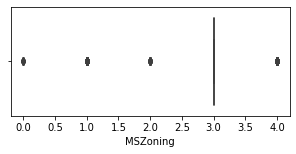

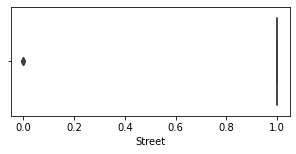

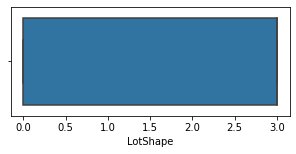

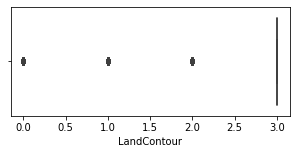

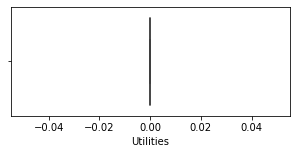

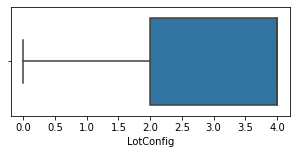

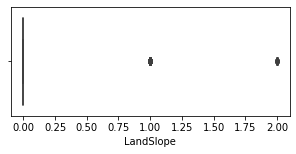

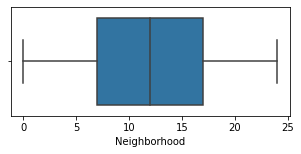

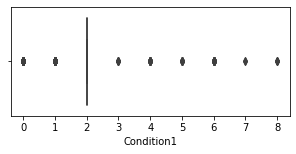

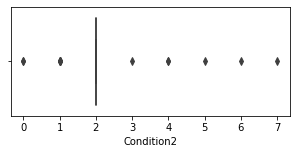

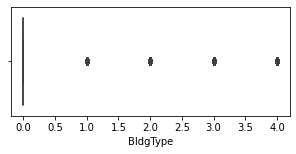

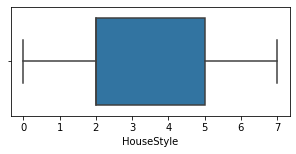

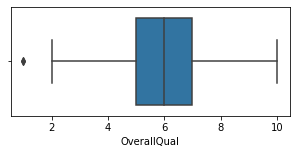

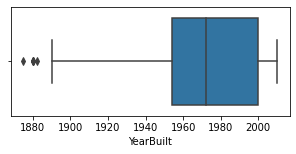

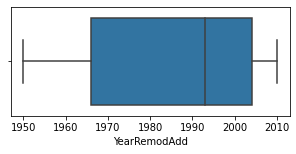

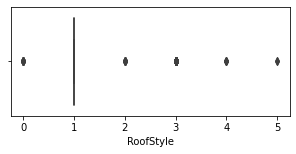

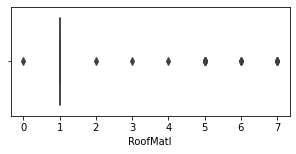

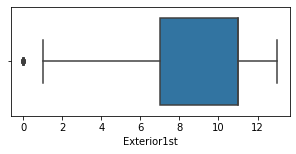

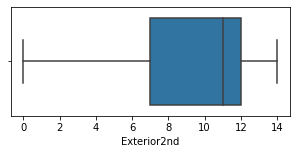

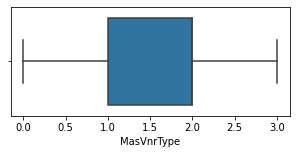

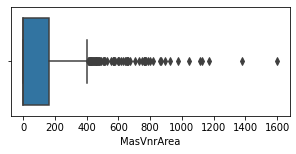

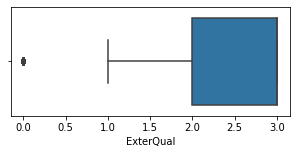

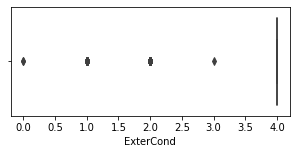

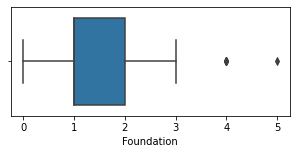

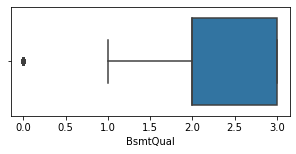

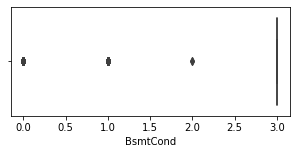

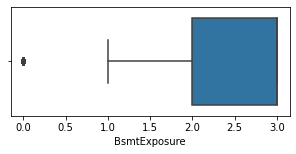

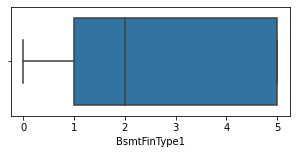

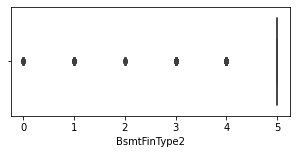

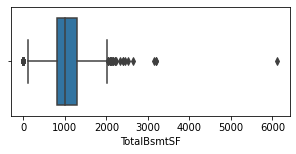

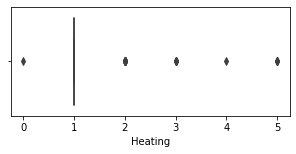

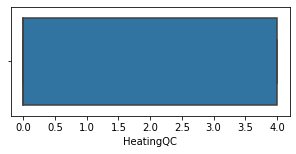

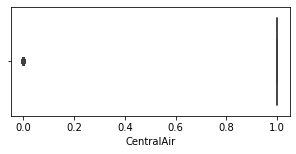

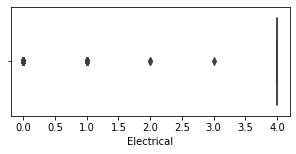

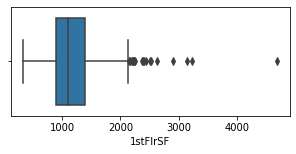

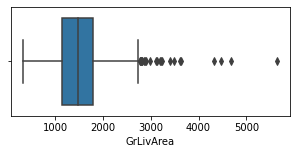

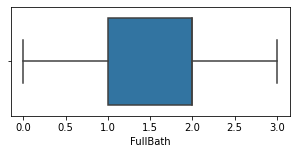

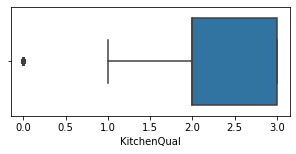

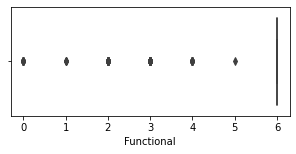

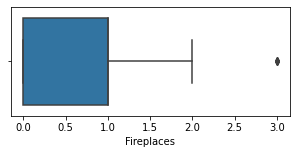

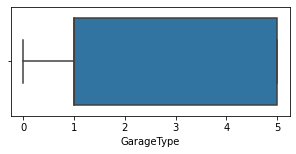

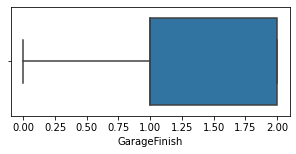

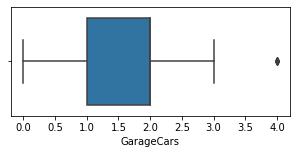

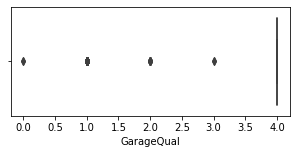

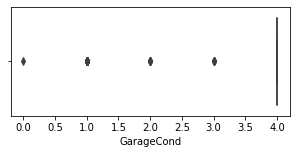

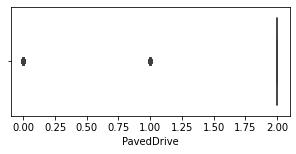

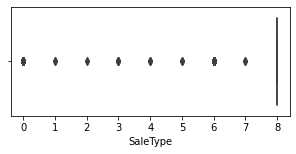

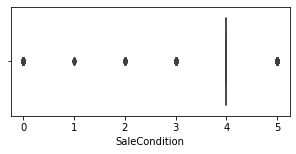

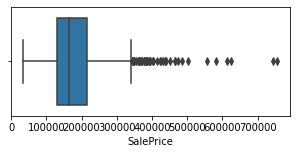

In [56]:
 for i in train4.columns:
        plt.figure(figsize=(5,2))
        sns.boxplot(train4[i])

In [57]:
Q1 = train4.quantile(0.25)
Q3 = train4.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

MSZoning             0.00
Street               0.00
LotShape             3.00
LandContour          0.00
Utilities            0.00
LotConfig            2.00
LandSlope            0.00
Neighborhood        10.00
Condition1           0.00
Condition2           0.00
BldgType             0.00
HouseStyle           3.00
OverallQual          2.00
YearBuilt           46.00
YearRemodAdd        38.00
RoofStyle            0.00
RoofMatl             0.00
Exterior1st          4.00
Exterior2nd          5.00
MasVnrType           1.00
MasVnrArea         160.00
ExterQual            1.00
ExterCond            0.00
Foundation           1.00
BsmtQual             1.00
BsmtCond             0.00
BsmtExposure         1.00
BsmtFinType1         4.00
BsmtFinType2         0.00
TotalBsmtSF        492.50
Heating              0.00
HeatingQC            4.00
CentralAir           0.00
Electrical           0.00
1stFlrSF           500.00
GrLivArea          651.75
FullBath             1.00
KitchenQual          1.00
Functional  

In [58]:
 print((train4 < (Q1 - 1.5 * IQR)) |(train4 > (Q3 + 1.5 * IQR)))

      MSZoning  Street  LotShape  ...  SaleType  SaleCondition  SalePrice
0        False   False     False  ...     False          False      False
1        False   False     False  ...     False          False      False
2        False   False     False  ...     False          False      False
3        False   False     False  ...      True          False      False
4        False   False     False  ...     False          False      False
5        False   False     False  ...      True           True      False
6        False   False     False  ...     False          False      False
7        False   False     False  ...     False          False      False
8        False   False     False  ...     False          False      False
9        False   False     False  ...      True           True      False
10        True   False     False  ...     False          False      False
11       False   False     False  ...     False          False      False
12       False   False     False  ... 

In [59]:
train4_out = train4[~((train4 < (Q1 - 1.5 * IQR)) |(train4 > (Q3 + 1.5 * IQR))).any(axis=1)]
train4_out.shape

(155, 49)

In [60]:
train5 = train4[((train4 < (Q1 - 1.5 * IQR)) |(train4 > (Q3 + 1.5 * IQR))).any(axis=1)]


In [61]:
train4.shape , train5.shape

((1168, 49), (1013, 49))

In [62]:
##155 outliers are removed

In [63]:
##saame for test data

In [64]:
pd.set_option('max_rows', 10)

In [65]:
Q1 = test4.quantile(0.25)
Q3 = test4.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

MSZoning         0.0
Street           0.0
LotShape         3.0
LandContour      0.0
Utilities        0.0
                ... 
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
SaleType         0.0
SaleCondition    0.0
Length: 48, dtype: float64


In [66]:
test5 = test4[((test4 < (Q1 - 1.5 * IQR)) |(test4 > (Q3 + 1.5 * IQR))).any(axis=1)]


In [67]:
test4.shape , test5.shape

((291, 48), (238, 48))

In [68]:
291-238

53

In [69]:
## 53 outlier data points are removed from test dataset

In [70]:
##finding skewness in datasets

MSZoning
Skewness value of  MSZoning  is --->  -1.6830975301838245


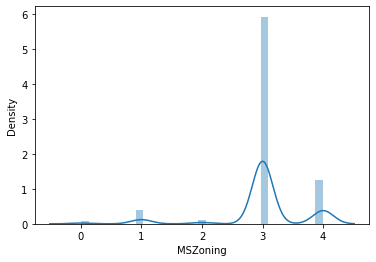




Street
Skewness value of  Street  is --->  -15.84288633307889


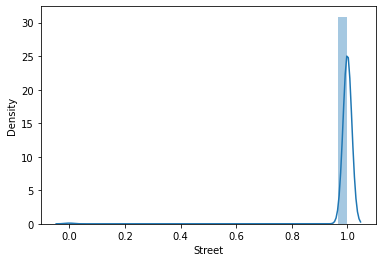




LotShape
Skewness value of  LotShape  is --->  -0.7092228701521732


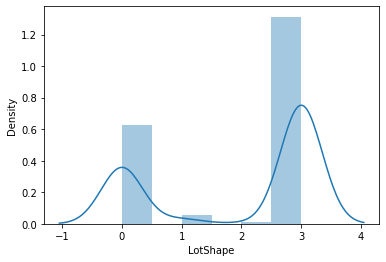




LandContour
Skewness value of  LandContour  is --->  -2.8474591091463077


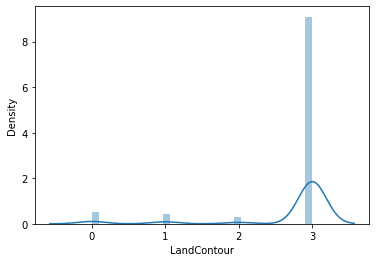




Utilities
Skewness value of  Utilities  is --->  0


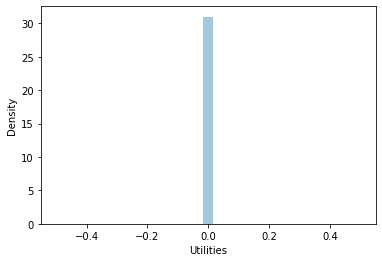




LotConfig
Skewness value of  LotConfig  is --->  -1.1854872452573155


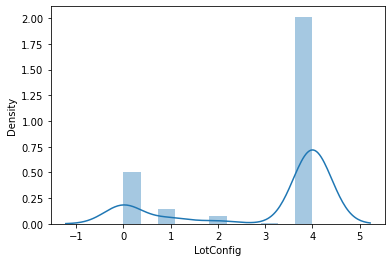




LandSlope
Skewness value of  LandSlope  is --->  4.440113459263467


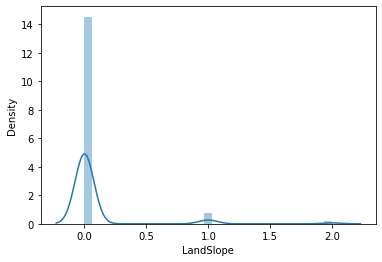




Neighborhood
Skewness value of  Neighborhood  is --->  -0.03706652649261999


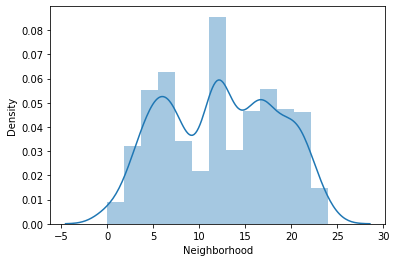




Condition1
Skewness value of  Condition1  is --->  2.7870465844367653


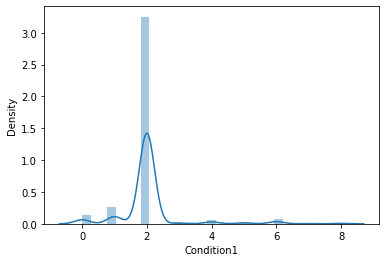




Condition2
Skewness value of  Condition2  is --->  10.716521568463005


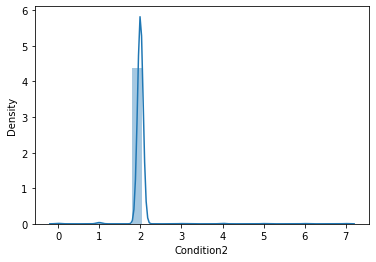




BldgType
Skewness value of  BldgType  is --->  2.0763494653127768


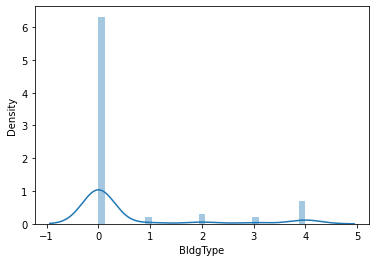




HouseStyle
Skewness value of  HouseStyle  is --->  0.35335569780640286


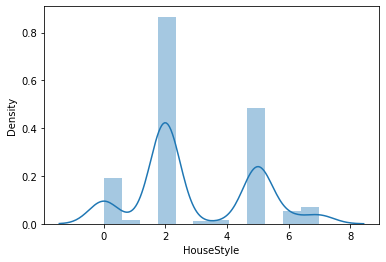




OverallQual
Skewness value of  OverallQual  is --->  0.22586745193917626


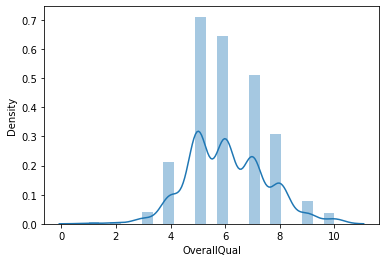




YearBuilt
Skewness value of  YearBuilt  is --->  -0.47948270063777537


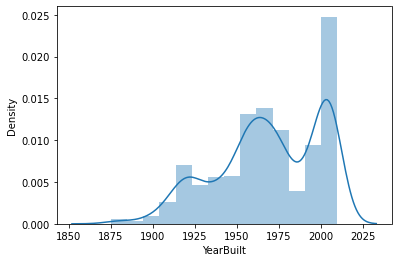




YearRemodAdd
Skewness value of  YearRemodAdd  is --->  -0.4013933314602971


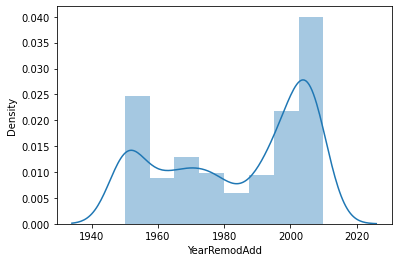




RoofStyle
Skewness value of  RoofStyle  is --->  1.2778778432286133


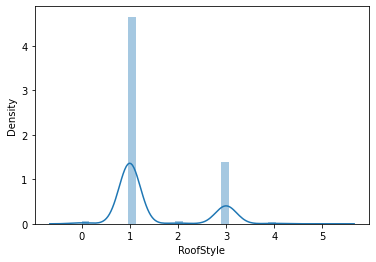




RoofMatl
Skewness value of  RoofMatl  is --->  7.030116338655027


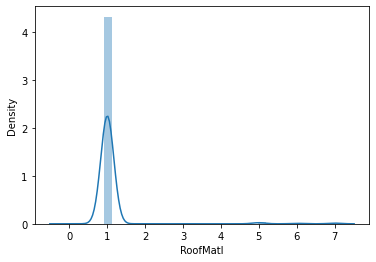




Exterior1st
Skewness value of  Exterior1st  is --->  -0.6125093115573434


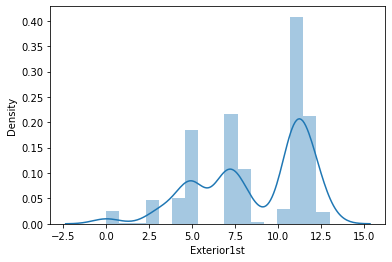




Exterior2nd
Skewness value of  Exterior2nd  is --->  -0.5767961975491097


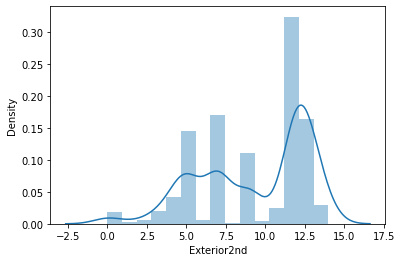




MasVnrType
Skewness value of  MasVnrType  is --->  -0.143497689556663


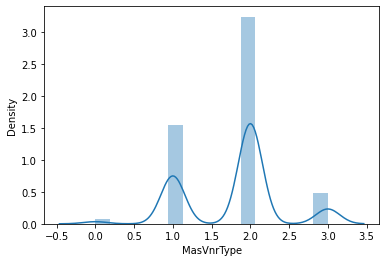




MasVnrArea
Skewness value of  MasVnrArea  is --->  2.763320070624756


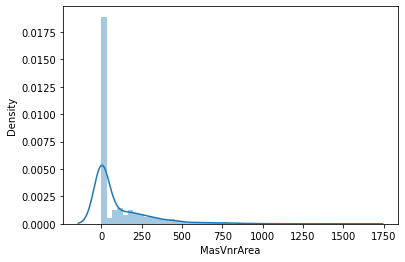




ExterQual
Skewness value of  ExterQual  is --->  -1.8797264413915853


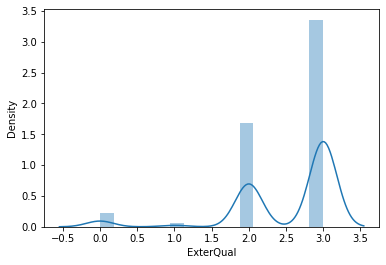




ExterCond
Skewness value of  ExterCond  is --->  -2.265610065131383


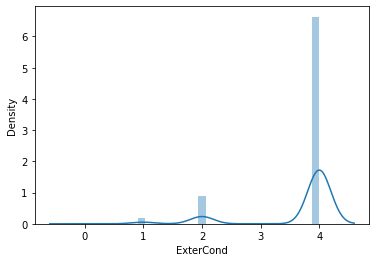




Foundation
Skewness value of  Foundation  is --->  0.11129006186662863


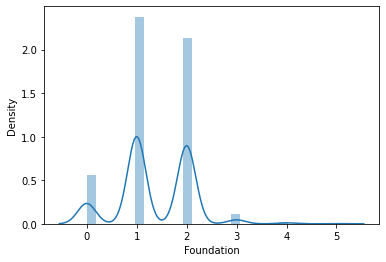




BsmtQual
Skewness value of  BsmtQual  is --->  -1.336550140235959


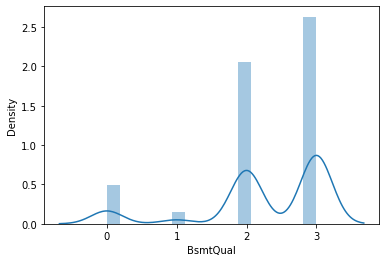




BsmtCond
Skewness value of  BsmtCond  is --->  -3.0061360263974195


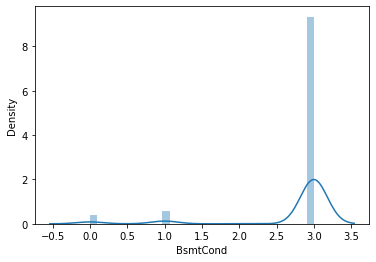




BsmtExposure
Skewness value of  BsmtExposure  is --->  -0.9922983697117911


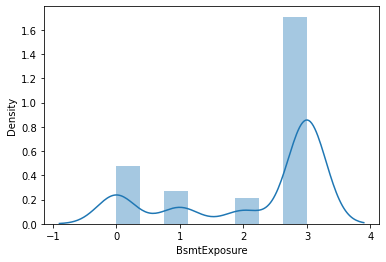




BsmtFinType1
Skewness value of  BsmtFinType1  is --->  -0.08884525630114336


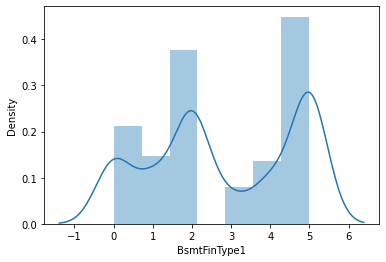




BsmtFinType2
Skewness value of  BsmtFinType2  is --->  -3.313658627539129


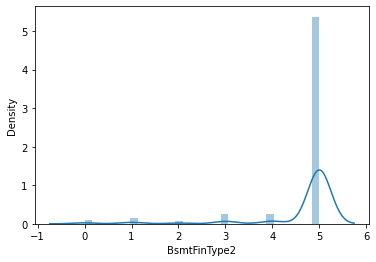




TotalBsmtSF
Skewness value of  TotalBsmtSF  is --->  1.7091634153989075


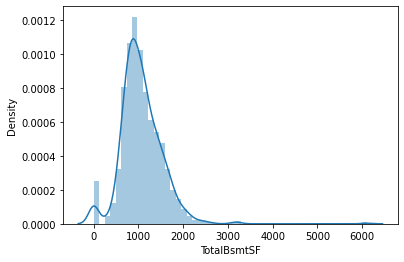




Heating
Skewness value of  Heating  is --->  9.391089754506382


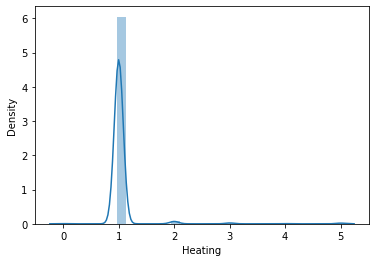




HeatingQC
Skewness value of  HeatingQC  is --->  0.3906460409498732


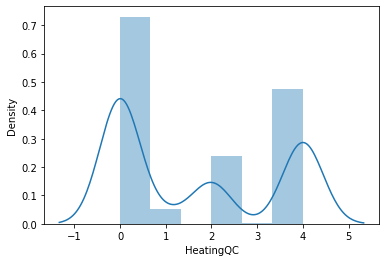




CentralAir
Skewness value of  CentralAir  is --->  -3.1781291264211555


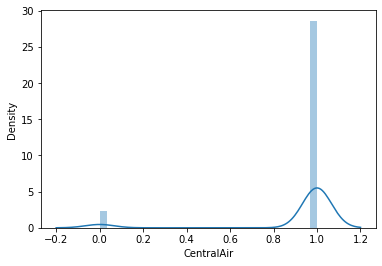




Electrical
Skewness value of  Electrical  is --->  -2.826243451702239


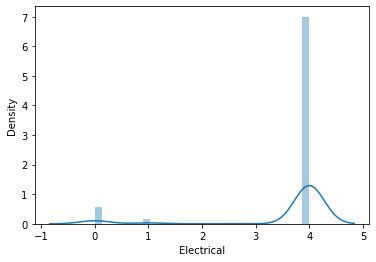




1stFlrSF
Skewness value of  1stFlrSF  is --->  1.4680226351476457


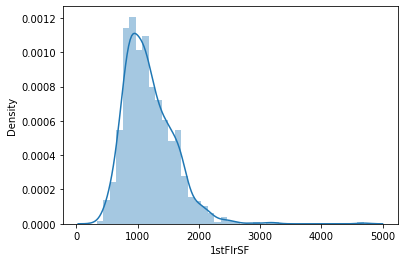




GrLivArea
Skewness value of  GrLivArea  is --->  1.5267422128714128


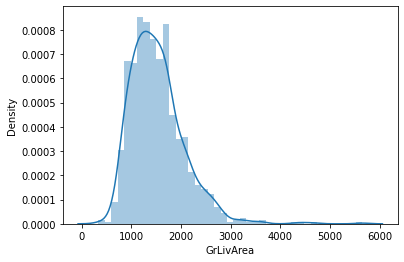




FullBath
Skewness value of  FullBath  is --->  0.16688597241582687


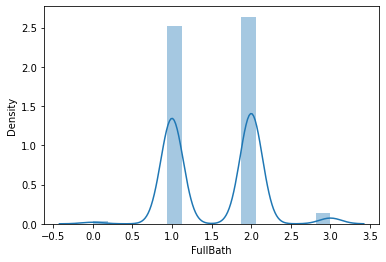




KitchenQual
Skewness value of  KitchenQual  is --->  -1.4094300442786203


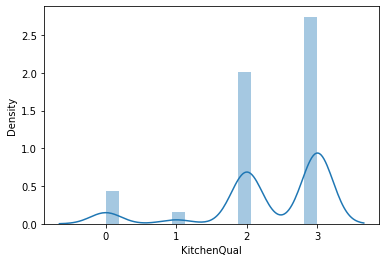




Functional
Skewness value of  Functional  is --->  -3.674445486965463


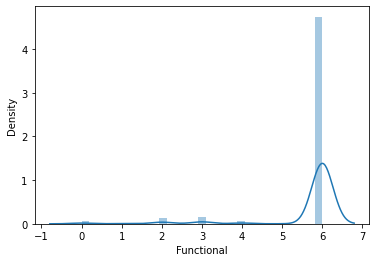




Fireplaces
Skewness value of  Fireplaces  is --->  0.7285782881637249


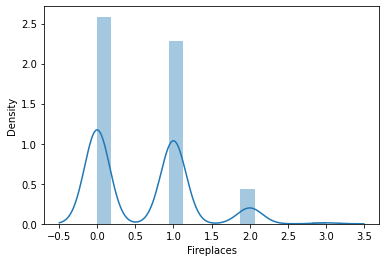




GarageType
Skewness value of  GarageType  is --->  0.7095377450037276


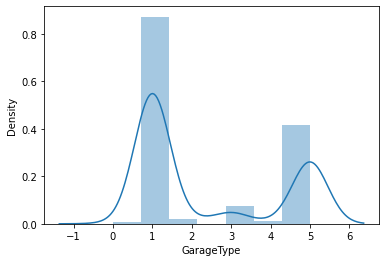




GarageFinish
Skewness value of  GarageFinish  is --->  -0.5452508026860777


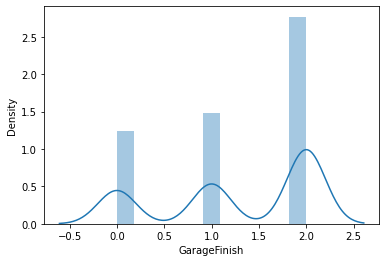




GarageCars
Skewness value of  GarageCars  is --->  -0.2877782967909776


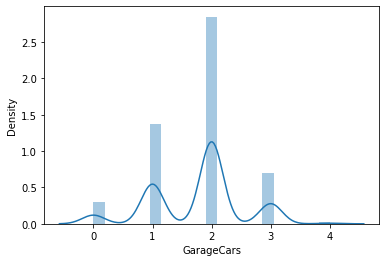




GarageQual
Skewness value of  GarageQual  is --->  -4.22288695501458


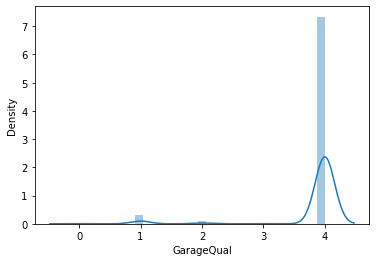




GarageCond
Skewness value of  GarageCond  is --->  -5.012206664946726


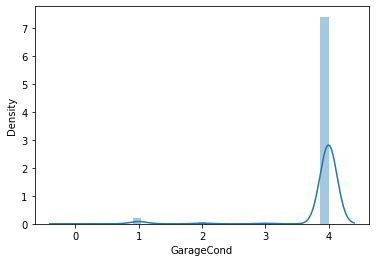




PavedDrive
Skewness value of  PavedDrive  is --->  -2.987563770629722


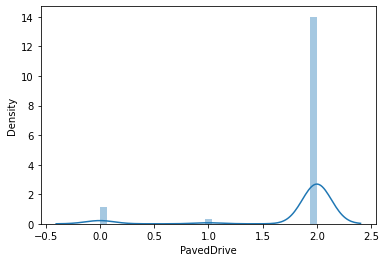




SaleType
Skewness value of  SaleType  is --->  -3.3586761257123237


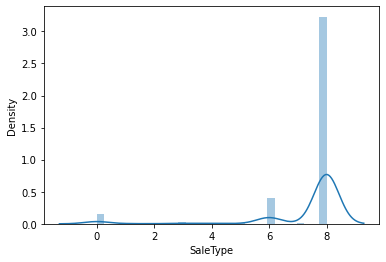




SaleCondition
Skewness value of  SaleCondition  is --->  -2.4254116815334763


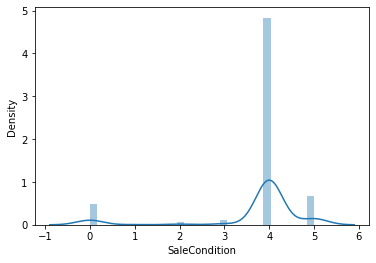




SalePrice
Skewness value of  SalePrice  is --->  1.9612168041868159


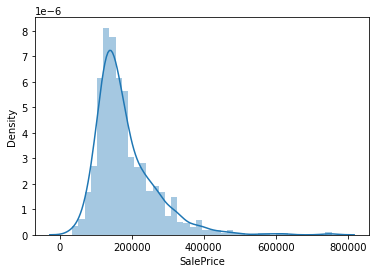

In [71]:
for i in train5.columns :
  print(i)
  print("Skewness value of ",i," is ---> " ,train5[i].skew())
  plt.figure()
  sns.distplot(train5[i])
  plt.show()
  print("\n\n")

In [72]:
test5['Utilities'].value_counts()

0.0    237
1.0      1
Name: Utilities, dtype: int64

In [73]:
train5.drop("Utilities",axis=1,inplace=True)
test5.drop("Utilities",axis=1,inplace=True)

In [74]:
pd.set_option("max_rows",100)

In [75]:
train5.skew()

MSZoning         -1.683098
Street          -15.842886
LotShape         -0.709223
LandContour      -2.847459
LotConfig        -1.185487
LandSlope         4.440113
Neighborhood     -0.037067
Condition1        2.787047
Condition2       10.716522
BldgType          2.076349
HouseStyle        0.353356
OverallQual       0.225867
YearBuilt        -0.479483
YearRemodAdd     -0.401393
RoofStyle         1.277878
RoofMatl          7.030116
Exterior1st      -0.612509
Exterior2nd      -0.576796
MasVnrType       -0.143498
MasVnrArea        2.763320
ExterQual        -1.879726
ExterCond        -2.265610
Foundation        0.111290
BsmtQual         -1.336550
BsmtCond         -3.006136
BsmtExposure     -0.992298
BsmtFinType1     -0.088845
BsmtFinType2     -3.313659
TotalBsmtSF       1.709163
Heating           9.391090
HeatingQC         0.390646
CentralAir       -3.178129
Electrical       -2.826243
1stFlrSF          1.468023
GrLivArea         1.526742
FullBath          0.166886
KitchenQual      -1.409430
F

In [76]:
train7 = train5.copy()

In [77]:
##removing skewness

In [78]:
train7['MSZoning'] = np.log1p(train7['MSZoning'])
train7['LandSlope'] = np.log1p(train7['LandSlope'])
train7['BldgType'] = np.log1p(train7['BldgType'])
train7['RoofStyle'] = np.log1p(train7['RoofStyle'])
train7['RoofMatl'] = np.log1p(train7['RoofMatl'])
train7['ExterQual'] = np.log1p(train7['ExterQual'])
train7['MasVnrArea'] = np.log1p(train7['MasVnrArea'])
train7['BsmtFinType2'] = np.log1p(train7['BsmtFinType2'])
train7['TotalBsmtSF'] = np.log1p(train7['TotalBsmtSF'])
train7['Heating'] = np.log1p(train7['Heating'])
train7['1stFlrSF'] = np.log1p(train7['1stFlrSF'])
train7['GrLivArea'] = np.log1p(train7['GrLivArea'])
train7['KitchenQual'] = np.log1p(train7['KitchenQual'])
train7['SaleType'] = np.log1p(train7['SaleType'])
train7['SaleCondition'] = np.log1p(train7['SaleCondition'])
train7['SalePrice'] = np.log1p(train7['SalePrice'])

In [79]:
pd.set_option("max_rows" , 100)

In [80]:
train7.skew()

MSZoning         -3.223006
Street          -15.842886
LotShape         -0.709223
LandContour      -2.847459
LotConfig        -1.185487
LandSlope         3.951019
Neighborhood     -0.037067
Condition1        2.787047
Condition2       10.716522
BldgType          1.850269
HouseStyle        0.353356
OverallQual       0.225867
YearBuilt        -0.479483
YearRemodAdd     -0.401393
RoofStyle         0.951207
RoofMatl          6.505898
Exterior1st      -0.612509
Exterior2nd      -0.576796
MasVnrType       -0.143498
MasVnrArea        0.543191
ExterQual        -3.007143
ExterCond        -2.265610
Foundation        0.111290
BsmtQual         -1.336550
BsmtCond         -3.006136
BsmtExposure     -0.992298
BsmtFinType1     -0.088845
BsmtFinType2     -4.263577
TotalBsmtSF      -4.813057
Heating           7.231377
HeatingQC         0.390646
CentralAir       -3.178129
Electrical       -2.826243
1stFlrSF          0.042693
GrLivArea         0.050996
FullBath          0.166886
KitchenQual      -2.180735
F

In [81]:
##street,landcontour,lotconfig,condition1 ,condition2,extercond ,centralair ,elecrical,fnctional,GarageQual, garagecond ,paveddrive

In [82]:
train7['LandSlope'] = np.sqrt(train7['LandSlope'])
train7['Condition1'] = np.sqrt(train7['Condition1'])
train7['Condition2'] = np.sqrt(train7['Condition2'])
train7['BldgType'] = np.sqrt(train7['BldgType'])
train7['RoofStyle'] = np.sqrt(train7['RoofStyle'])
train7['RoofMatl'] = np.sqrt(train7['RoofMatl'])
train7['MasVnrArea'] = np.sqrt(train7['MasVnrArea'])
train7['TotalBsmtSF'] = np.sqrt(train7['TotalBsmtSF'])
train7['Heating'] = np.sqrt(train7['Heating'])
train7['1stFlrSF'] = np.sqrt(train7['1stFlrSF'])
train7['GrLivArea'] = np.sqrt(train7['GrLivArea'])
train7['SaleCondition'] = np.sqrt(train7['SaleCondition'])
train7['SalePrice'] = np.sqrt(train7['SalePrice'])

In [83]:
train7.skew()

MSZoning         -3.223006
Street          -15.842886
LotShape         -0.709223
LandContour      -2.847459
LotConfig        -1.185487
LandSlope         3.698554
Neighborhood     -0.037067
Condition1       -1.129450
Condition2       -2.442648
BldgType          1.703922
HouseStyle        0.353356
OverallQual       0.225867
YearBuilt        -0.479483
YearRemodAdd     -0.401393
RoofStyle        -0.738882
RoofMatl          4.650453
Exterior1st      -0.612509
Exterior2nd      -0.576796
MasVnrType       -0.143498
MasVnrArea        0.463234
ExterQual        -3.007143
ExterCond        -2.265610
Foundation        0.111290
BsmtQual         -1.336550
BsmtCond         -3.006136
BsmtExposure     -0.992298
BsmtFinType1     -0.088845
BsmtFinType2     -4.263577
TotalBsmtSF      -5.352554
Heating           1.801968
HeatingQC         0.390646
CentralAir       -3.178129
Electrical       -2.826243
1stFlrSF         -0.033686
GrLivArea        -0.034106
FullBath          0.166886
KitchenQual      -2.180735
F

In [84]:
test7 = test5.copy()

In [85]:
test5.skew()

MSZoning         -0.001260
Street          -10.839157
LotShape         -0.748552
LandContour      -2.923712
LotConfig        -1.195349
LandSlope         4.128377
Neighborhood     -0.080905
Condition1        2.521865
Condition2       15.427249
BldgType          1.667520
HouseStyle        0.491188
OverallQual       0.369437
YearBuilt        -0.706782
YearRemodAdd     -0.524140
RoofStyle         1.070607
RoofMatl         12.376509
Exterior1st      -0.614792
Exterior2nd      -0.628984
MasVnrType       -0.018985
MasVnrArea        1.949799
ExterQual        -1.921674
ExterCond        -3.172441
Foundation        0.568912
BsmtQual         -1.307760
BsmtCond         -4.339859
BsmtExposure     -1.021577
BsmtFinType1      0.057300
BsmtFinType2     -3.268129
TotalBsmtSF       0.559164
Heating           7.386876
HeatingQC         0.322560
CentralAir       -3.349348
Electrical       -2.605322
1stFlrSF          0.695930
GrLivArea         1.051161
FullBath          0.054693
KitchenQual      -1.435997
F

In [86]:
test7['Condition1'] = np.log1p(test7['Condition1'])
test7['Condition2'] = np.log1p(test7['Condition2'])
test7['RoofMatl'] = np.log1p(test7['RoofMatl'])


In [87]:
test7.skew()

MSZoning         -0.001260
Street          -10.839157
LotShape         -0.748552
LandContour      -2.923712
LotConfig        -1.195349
LandSlope         4.128377
Neighborhood     -0.080905
Condition1       -1.059971
Condition2       15.427249
BldgType          1.667520
HouseStyle        0.491188
OverallQual       0.369437
YearBuilt        -0.706782
YearRemodAdd     -0.524140
RoofStyle         1.070607
RoofMatl         11.621067
Exterior1st      -0.614792
Exterior2nd      -0.628984
MasVnrType       -0.018985
MasVnrArea        1.949799
ExterQual        -1.921674
ExterCond        -3.172441
Foundation        0.568912
BsmtQual         -1.307760
BsmtCond         -4.339859
BsmtExposure     -1.021577
BsmtFinType1      0.057300
BsmtFinType2     -3.268129
TotalBsmtSF       0.559164
Heating           7.386876
HeatingQC         0.322560
CentralAir       -3.349348
Electrical       -2.605322
1stFlrSF          0.695930
GrLivArea         1.051161
FullBath          0.054693
KitchenQual      -1.435997
F

In [88]:
test7['Condition2'] = np.cbrt(test7['Condition2'])
test7['RoofMatl'] = np.cbrt(test7['RoofMatl'])

In [89]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [90]:
train8 = pd.DataFrame(ss.fit_transform(train7),columns=train7.columns)
test8 = pd.DataFrame(ss.fit_transform(test7),columns=test7.columns)

In [91]:
x = train8.iloc[:,0:-1] 
y = train8.iloc[:,-1]

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

def max_r2_score(reg,x,y):
    max_r2score=0
    for r_state in range(42,101):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20)
        reg.fit(train_x,train_y)
        pred=reg.predict(test_x)
        r2score=r2_score(test_y,pred)
        if r2score>max_r2score:
            max_r2score=r2score
            final_r_state=r_state
    print("The maximum r2 score", max_r2score, "is achieved at r_state", final_r_state)
    return final_r_state

In [93]:
lr=LinearRegression()
max_r2_score(lr,x,y)

The maximum r2 score 0.9020053903493834 is achieved at r_state 82


82

In [94]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=82,test_size=0.20)

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
parameters={'n_neighbors':(1,10)}
gdk=GridSearchCV(kn,parameters)
gdk.fit(train_x,train_y)
gdk.best_params_

{'n_neighbors': 10}

In [96]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
parameters={'criterion':('mse','friedman_mse','mae')}
gdd=GridSearchCV(dt,parameters)
gdd.fit(train_x,train_y)
gdd.best_params_

{'criterion': 'friedman_mse'}

In [97]:
from sklearn.svm import SVR
sv=SVR()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gdsr=GridSearchCV(sv,parameters)
gdsr.fit(train_x,train_y)
gdsr.best_params_

{'C': 1, 'kernel': 'linear'}

In [98]:
score=[]
cv=[]
Mean=[]
Root=[]

models=[lr,KNeighborsRegressor(n_neighbors=10),DecisionTreeRegressor(criterion='friedman_mse'),SVR(C=1,kernel='linear')]

for i in models:
    i.fit(train_x,train_y)
    pred=i.predict(test_x)
    r2score=r2_score(test_y,pred)
    score.append(r2score)
    print(i)
    print("")
    print("The r2 score is ", r2score)
    cross=cross_val_score(i,x,y,cv=5,scoring='r2').mean()
    cv.append(cross)
    print("")
    print("The cross validation score is", cross)
    print()
    Meanerror=mean_absolute_error(test_y,pred)
    Mean.append(Meanerror)
    print("The mean absolute error is ", Meanerror)
    rmse=np.sqrt(Meanerror)
    Root.append(rmse)
    print()
    print("The root mean square error is", rmse)
    print()
    print()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The r2 score is  0.9020053903493834

The cross validation score is 0.8399717269975371

The mean absolute error is  0.23876150232315493

The root mean square error is 0.48863227720153213


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

The r2 score is  0.768871795138217

The cross validation score is 0.734553742786274

The mean absolute error is  0.3539450943354122

The root mean square error is 0.594932848593362


DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
          

In [99]:
result=pd.DataFrame({'Model':['LinearRegression','KNeighborsRegressor', 'DecisionTreeRegressor', 'SVR'],'R2score':score,'Cross_val_score':cv,'Mean Squared Error':Mean, 'Root Mean Squared Error': Root})
result

,Model,R2score,Cross_val_score,Mean Squared Error,Root Mean Squared Error
0,LinearRegression,0.902005,0.839972,0.238762,0.488632
1,KNeighborsRegressor,0.768872,0.734554,0.353945,0.594933
2,DecisionTreeRegressor,0.688290,0.661278,0.420872,0.648747
3,SVR,0.898877,0.839726,0.240180,0.490081


In [100]:
lr.score(train_x,train_y)

0.8697689103052995

In [101]:
lr.score(test_x,test_y)

0.9020053903493834

In [102]:
##linear regression is working best

In [103]:
## using regularization methods

In [104]:
##lasso and ridge

In [105]:
from sklearn.linear_model import Lasso
ls=Lasso()
parameters={'alpha':(0.001,0.01,0.1,1)}
gdls=GridSearchCV(ls,parameters)
gdls.fit(train_x,train_y)
gdls.best_params_

{'alpha': 0.01}

In [106]:
ls=Lasso(alpha=0.01)
max_r2_score(ls,x,y)

The maximum r2 score 0.9023985258789524 is achieved at r_state 58


58

In [107]:
cvscore=cross_val_score(ls,x,y,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)

The cross validation score is 0.8497550261415899


In [108]:
from sklearn.linear_model import Ridge
rd=Ridge()
parameters={'alpha':(0.001,0.01,0.1,1)}
grd=GridSearchCV(rd,parameters)
grd.fit(train_x,train_y)
grd.best_params_

{'alpha': 1}

In [109]:
rd=Ridge(alpha=1)
max_r2_score(rd,x,y)

The maximum r2 score 0.9019536031431286 is achieved at r_state 82


82

In [110]:
cvscore=cross_val_score(rd,x,y,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)


The cross validation score is 0.840149691215226


In [111]:
##using ensemble techniques

In [112]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [113]:
rf=RandomForestRegressor()
parameters={'n_estimators':(50,100,200,500)}
gdrf=GridSearchCV(rf,parameters)
gdrf.fit(train_x,train_y)
gdrf.best_params_

{'n_estimators': 200}

In [114]:
rf=RandomForestRegressor(n_estimators=200)
max_r2_score(rf,x,y)

The maximum r2 score 0.8991071824518869 is achieved at r_state 53


53

In [115]:
cvscore=cross_val_score(rf,x,y,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)

The cross validation score is 0.8400381911452


In [116]:
gb=GradientBoostingRegressor()
parameters={'learning_rate':(0.001,0.01,0.1,1), 'n_estimators':(10,50,100,500)}
gdg=GridSearchCV(gb,parameters)                                                                                                                                        
gdg.fit(train_x,train_y)                                                                                                                                         
gdg.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [117]:
gb=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1)
max_r2_score(gb,x,y)

The maximum r2 score 0.904435269056832 is achieved at r_state 92


92

In [118]:
cvscore=cross_val_score(gb,x,y,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)

The cross validation score is 0.8592324766173111


In [119]:
ad=AdaBoostRegressor()
parameters={'n_estimators':(10,50,100,200,500),'learning_rate':(0.001,0.01,0.1,1)}
gad=GridSearchCV(ad,parameters)
gad.fit(train_x,train_y)
gad.best_params_

{'learning_rate': 1, 'n_estimators': 100}

In [120]:
ad=AdaBoostRegressor(n_estimators=50,learning_rate=0.1)
max_r2_score(ad,x,y)

The maximum r2 score 0.836473120344203 is achieved at r_state 53


53

In [121]:
cvscore=cross_val_score(ad,x,y,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)

The cross validation score is 0.7554998318594548


In [122]:
result_boosters=pd.DataFrame({'Boosters':['Lasso','Ridge','RandomForestRegressor','GradientBoostRegressor','AdaBoostRegressor'],'R2 Score':[0.9,0.9,0.89,0.9,0.83],'Cross_val_score':[0.85,0.84,0.84,0.86,0.75]})
result_boosters

,Boosters,R2 Score,Cross_val_score
0,Lasso,0.90,0.85
1,Ridge,0.90,0.84
2,RandomForestRegressor,0.89,0.84
3,GradientBoostRegressor,0.90,0.86
4,AdaBoostRegressor,0.83,0.75


In [123]:
##so GradientBoostRegressor is the best model

In [135]:
##saving the model

In [136]:
import joblib
joblib.dump(gb,'HousingPricePrediction.pkl')

['HousingPricePrediction.pkl']

In [137]:
##predicting test8 dataset results using GradientBoostRegressor model

In [138]:
predict = pd.DataFrame(gb.predict(test8) , columns = ['Predicted_values'])

In [141]:
predict

,Predicted_values
0,1.634226
1,0.776086
2,1.042290
3,-0.117511
4,0.378373
...,...
233,-0.126581
234,1.067742
235,1.141790
236,-0.548719


In [142]:
## saving predicted values to a csv file

In [143]:
predict.to_csv("PredictionsHousingDataSet.csv")